In [1]:
#1. Preprocessing Steps
#Import necessary libraries (Pandas, NumPy, Matplotlib, Seaborn).
#Load the healthcare dataset.
#Identify column types (numerical and categorical).
#Check the dataset shape and structure.
#2. Identifying Missing Values
#Check for null values across all columns.
#Visualize missing data using a heatmap.
#Analyze the percentage of missing data per feature.
#3. Summary Statistics
#Generate descriptive statistics for numerical features (e.g., Age, BMI, Heart Rate, Follow-up Days).
#Summarize categorical features (e.g., Gender, Diagnosis, Medication).
#4. Visualization of Relations Between Various Factors
#Countplots for categorical variables (e.g., Gender, Blood Pressure, Cholesterol, Diagnosis).
#Histograms for numerical variables (e.g., Age, BMI, Heart Rate).
#Scatter plots showing the relationship between Age and BMI.
#5. Correlation Analysis
#Correlation matrix for numerical variables.
#Heatmap to visualize correlation strength between features.
#6. Finding Outliers and Visualizations
#Boxplots for numerical features to detect outliers (e.g., BMI, Age, Heart Rate).
#Distribution plots to observe skewness in features like Charges and BMI.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import class_weight
import joblib

In [2]:
df = pd.read_excel("healthcare_data.xlsx")



In [3]:
#Howmany row and columns
print("Shape of Dataset:", df.shape)


Shape of Dataset: (10000, 11)


In [4]:
# columns row
print("\nColumn Names:", df.columns.tolist())



Column Names: ['Patient_ID', 'Age', 'Gender', 'Blood_Pressure', 'Cholesterol', 'Diagnosis', 'Smoker', 'BMI', 'Heart_Rate', 'Medication', 'Followup_Days']


In [5]:
#data type of columns
print("\nData Types:")
print(df.dtypes)



Data Types:
Patient_ID         object
Age               float64
Gender             object
Blood_Pressure     object
Cholesterol        object
Diagnosis          object
Smoker             object
BMI               float64
Heart_Rate        float64
Medication         object
Followup_Days     float64
dtype: object


In [6]:
#Loading First 5 lines of Dataset 
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
  Patient_ID   Age  Gender Blood_Pressure Cholesterol     Diagnosis Smoker  \
0   PID00000  51.0  Female         140/90      Normal        Asthma    NaN   
1   PID00001  92.0  Female         150/95        High           NaN    NaN   
2   PID00002  14.0    Male         110/70         NaN  Hypertension     No   
3   PID00003  71.0    Male         110/70      Normal       Healthy    NaN   
4   PID00004  60.0    Male            NaN        High           NaN     No   

    BMI  Heart_Rate Medication  Followup_Days  
0  26.9        86.0      Med_C           90.0  
1  31.9        74.0      Med_A           60.0  
2  18.1        74.0      Med_C            NaN  
3  20.5       106.0      Med_A            NaN  
4  15.6        62.0      Med_B           60.0  


In [7]:
#Summary of dataset
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
       Patient_ID          Age Gender Blood_Pressure Cholesterol Diagnosis  \
count       10000  9800.000000  10000           8350        7512      8017   
unique      10000          NaN      4              5           3         5   
top      PID09983          NaN   Male         140/90      Normal   Healthy   
freq            1          NaN   3357           1707        2594      2048   
mean          NaN    49.272143    NaN            NaN         NaN       NaN   
std           NaN    28.844816    NaN            NaN         NaN       NaN   
min           NaN     0.000000    NaN            NaN         NaN       NaN   
25%           NaN    24.000000    NaN            NaN         NaN       NaN   
50%           NaN    49.000000    NaN            NaN         NaN       NaN   
75%           NaN    74.000000    NaN            NaN         NaN       NaN   
max           NaN    99.000000    NaN            NaN         NaN       NaN   

       Smoker          BMI   Heart_Rate Me

In [8]:
#Missing Value Analysis
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Patient_ID           0
Age                200
Gender               0
Blood_Pressure    1650
Cholesterol       2488
Diagnosis         1983
Smoker            3315
BMI                200
Heart_Rate         200
Medication        2505
Followup_Days     2022
dtype: int64


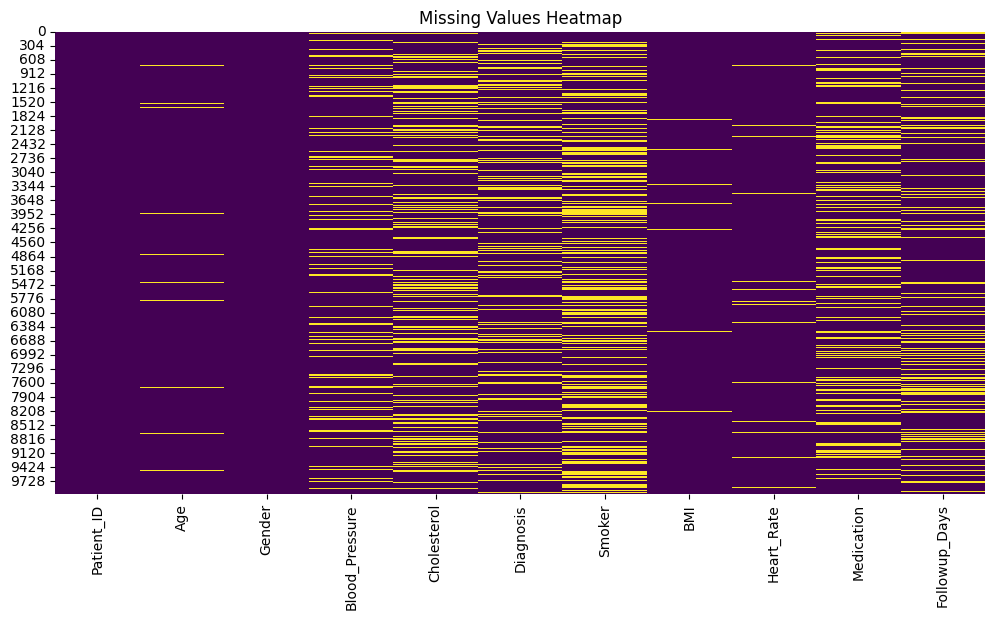

In [9]:
#Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [10]:
#Check for Duplicates
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


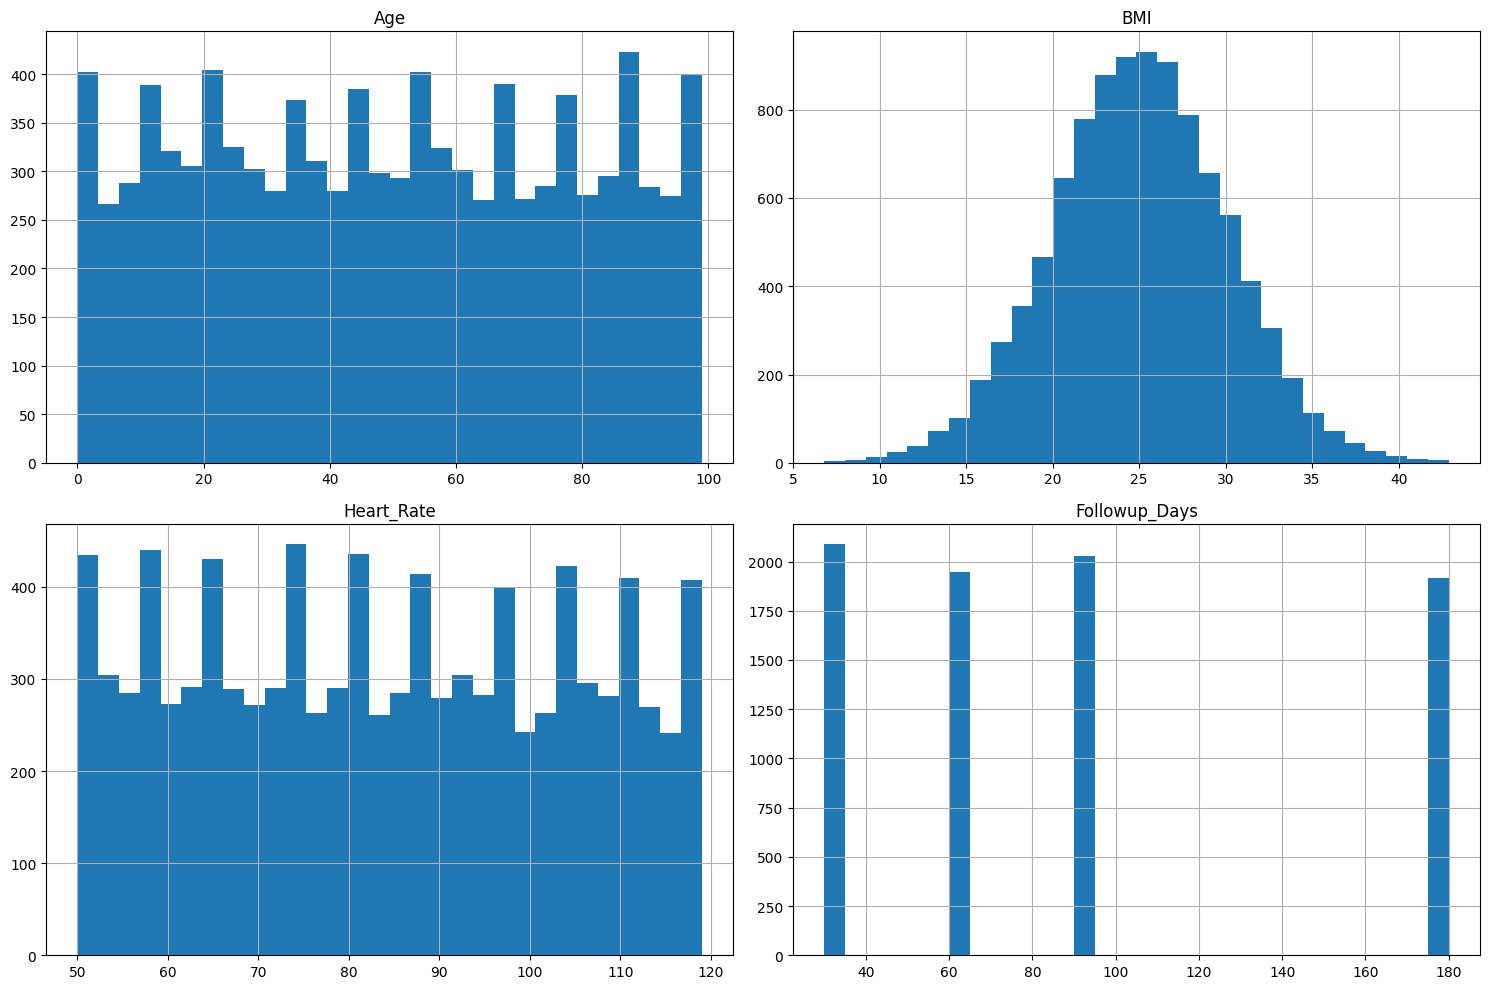

In [11]:
#visualised Analysis of Numerical Columns
numerical_cols = ['Age', 'BMI', 'Heart_Rate', 'Followup_Days']
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

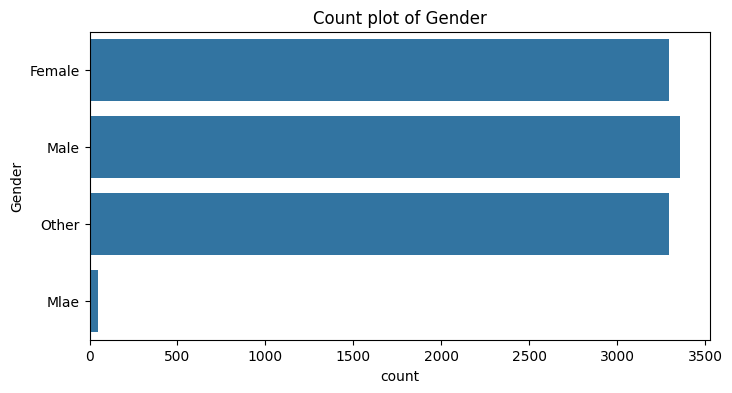

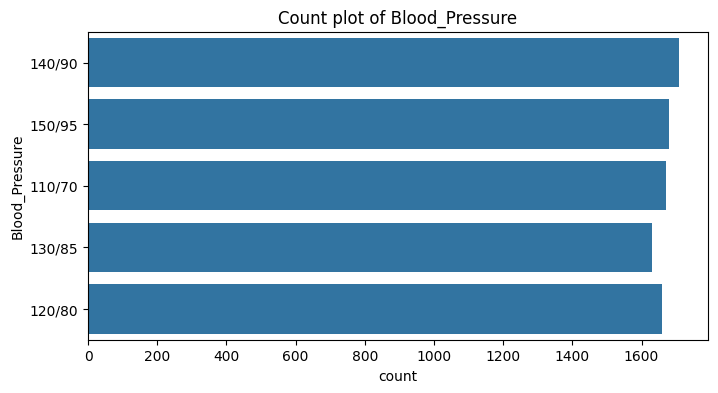

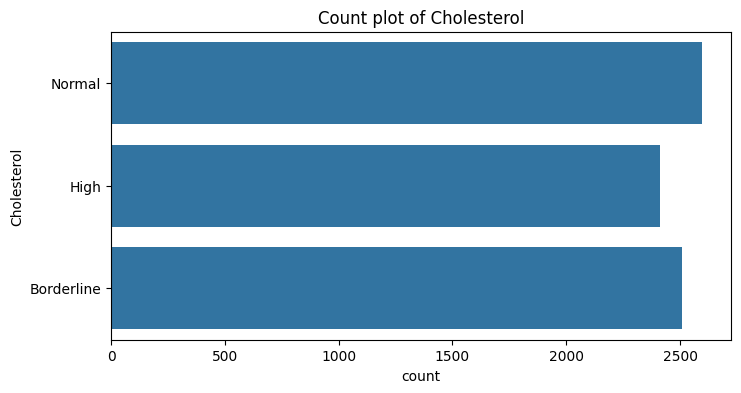

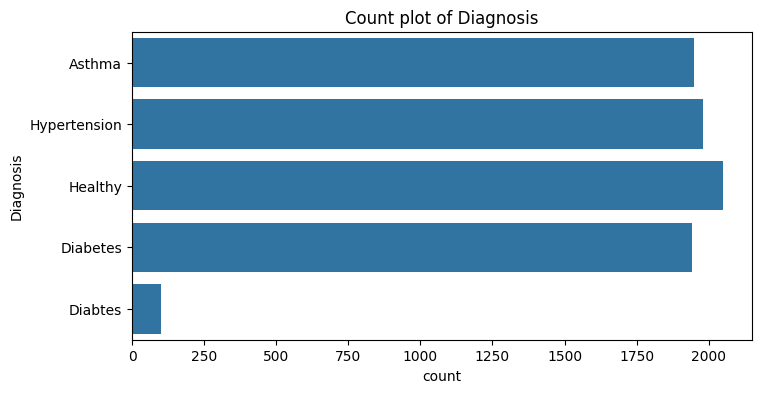

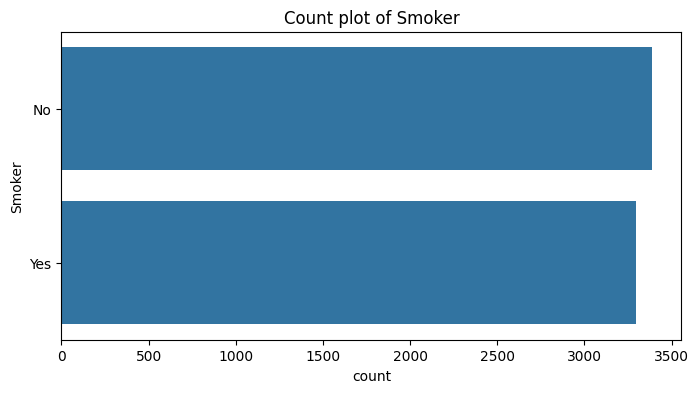

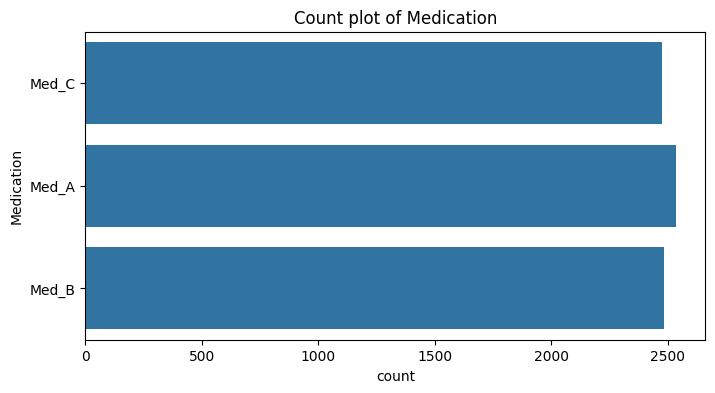

In [12]:
#Visualised Analysis of Categorical Columns
categorical_cols = ['Gender', 'Blood_Pressure', 'Cholesterol', 'Diagnosis', 'Smoker', 'Medication']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))  
    sns.countplot(y=col, data=df)
    plt.title(f"Count plot of {col}")
    plt.show()

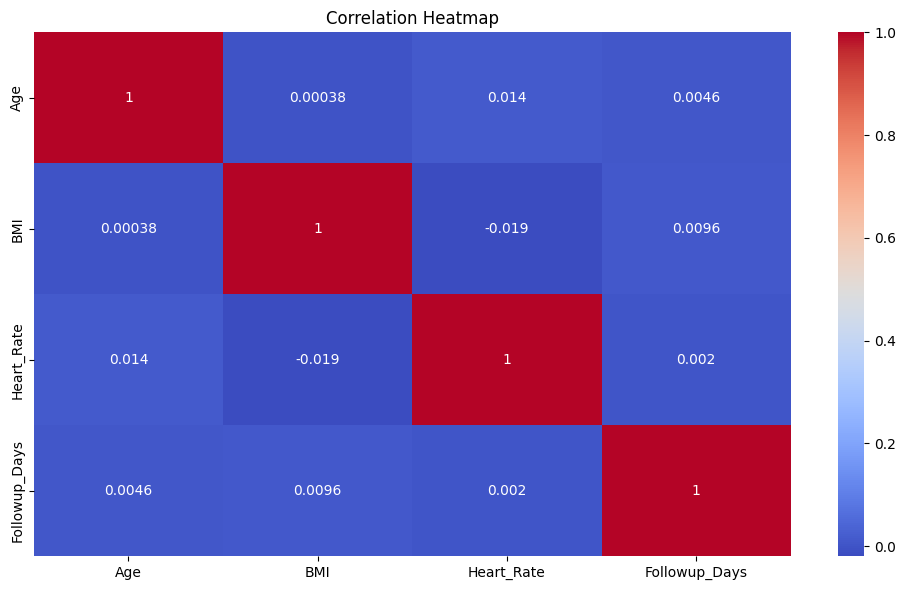

In [13]:
#Relation Table
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

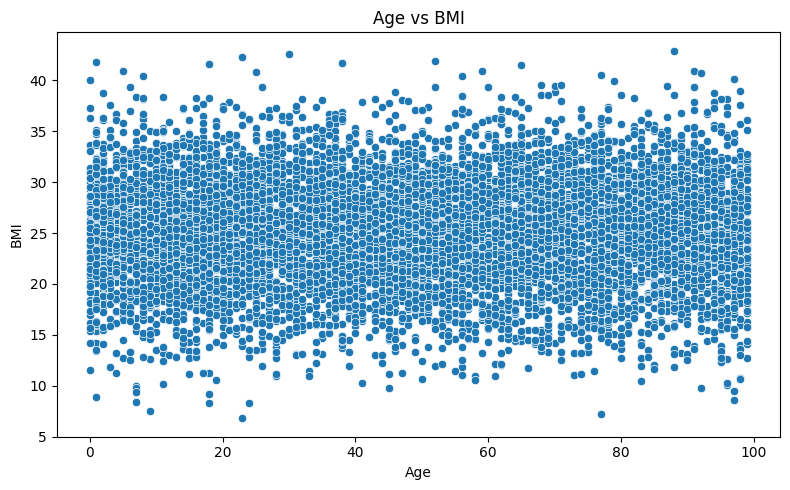

In [14]:
#Relationship scatter Plots of Age vs BMI
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Age", y="BMI", data=df)
plt.title("Age vs BMI")
plt.tight_layout()
plt.show()

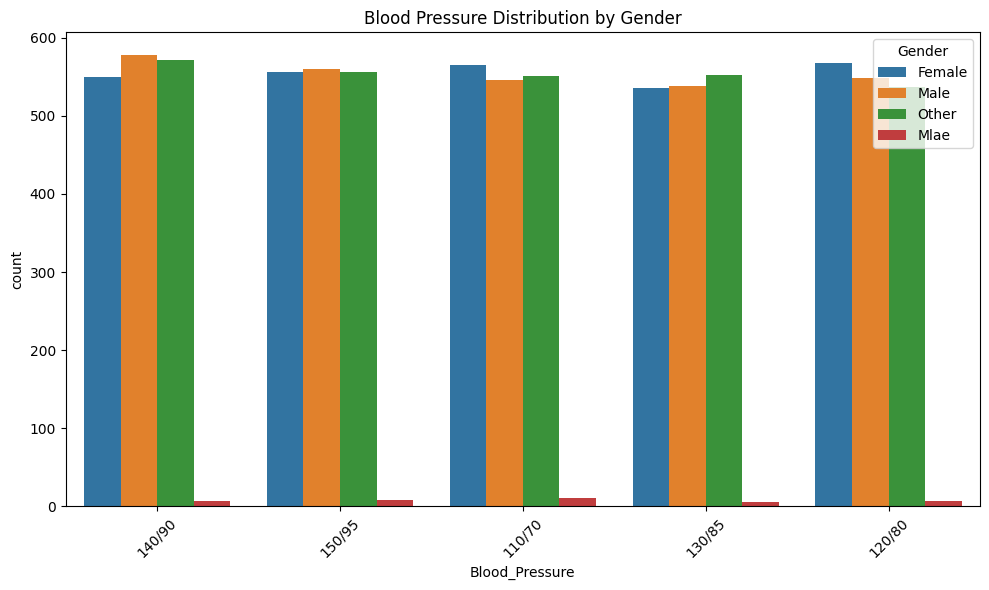

In [15]:
#Blood Pressure Distribution by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x="Blood_Pressure", hue="Gender", data=df)
plt.title("Blood Pressure Distribution by Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

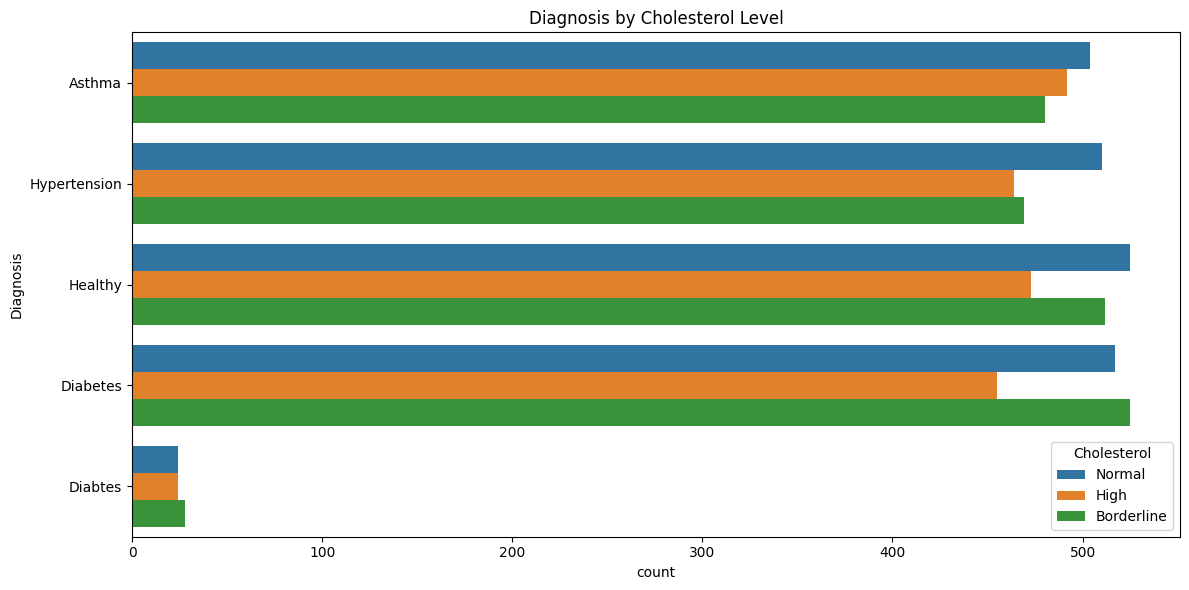

In [16]:
#Cholesterol vs Diagnosis
plt.figure(figsize=(12, 6))
sns.countplot(y="Diagnosis", hue="Cholesterol", data=df)
plt.title("Diagnosis by Cholesterol Level")
plt.tight_layout()
plt.show()

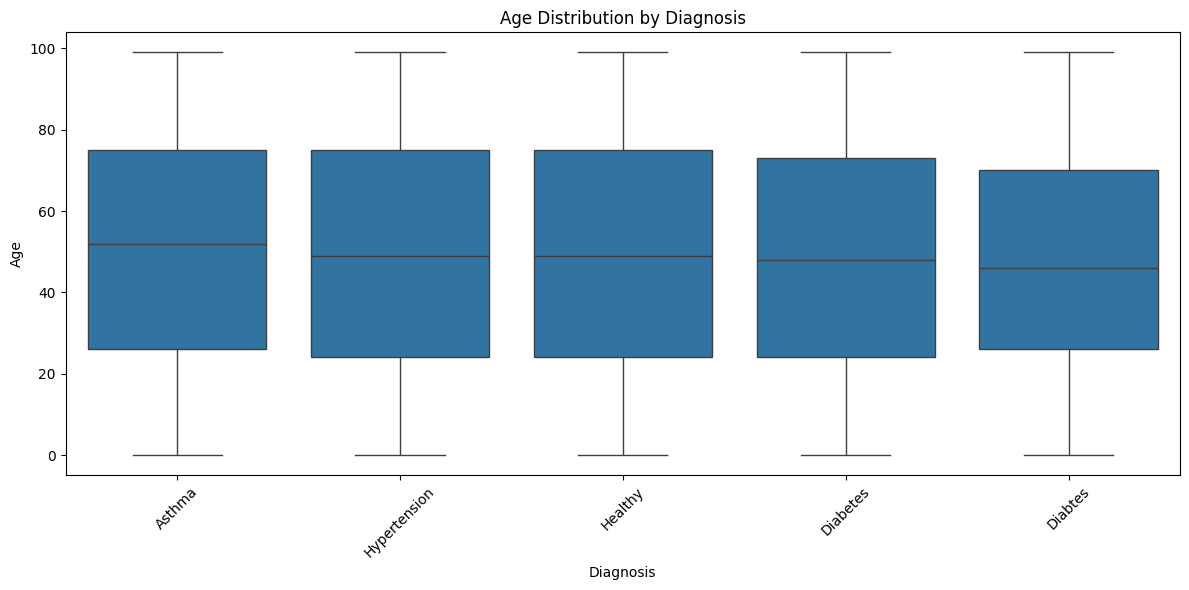

In [17]:
#Advanced Analysis - Age Distribution by Diagnosis
plt.figure(figsize=(12, 6))
sns.boxplot(x="Diagnosis", y="Age", data=df)
plt.title("Age Distribution by Diagnosis")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

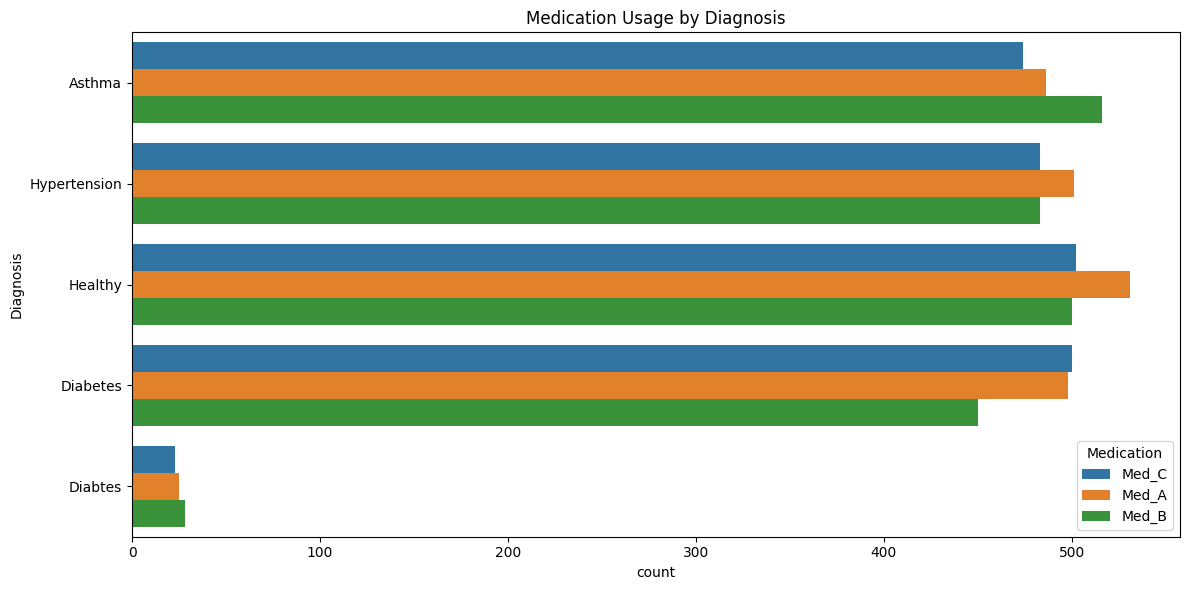

In [18]:
#Medication Usage by Condition
plt.figure(figsize=(12, 6))
sns.countplot(y="Diagnosis", hue="Medication", data=df)
plt.title("Medication Usage by Diagnosis")
plt.tight_layout()
plt.show()

In [19]:
#Summary
print("\nEDA Complete. Key findings:")
print("- Age distribution shows patients across all age groups")
print("- Various blood pressure and cholesterol levels present")
print("- Multiple diagnoses including Asthma, Diabetes, Hypertension")
print("- Several medications prescribed (Med_A, Med_B, Med_C)")
print("- Missing values present in several columns that may need addressing")
print("- Investigate relationships between age, BMI, and health conditions")


EDA Complete. Key findings:
- Age distribution shows patients across all age groups
- Various blood pressure and cholesterol levels present
- Multiple diagnoses including Asthma, Diabetes, Hypertension
- Several medications prescribed (Med_A, Med_B, Med_C)
- Missing values present in several columns that may need addressing
- Investigate relationships between age, BMI, and health conditions


In [20]:
#part b

In [21]:
#Handle Missing Value 
df.dropna(inplace=True)

In [30]:
#Encode Categorical Variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [23]:
#Define Features and Target
X = df.drop("Diagnosis", axis=1)  
y = df["Diagnosis"]

In [31]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



In [32]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
#Handle class imbalance with balanced weights
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [34]:
#Predictions
y_pred = model.predict(X_test_scaled)

In [35]:
# Evaluation (zero_division=0 avoids warnings)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.2361111111111111

Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.28      0.25        86
           1       0.25      0.24      0.25        90
           2       0.00      0.00      0.00         5
           3       0.23      0.23      0.23        92
           4       0.24      0.21      0.22        87

    accuracy                           0.24       360
   macro avg       0.19      0.19      0.19       360
weighted avg       0.23      0.24      0.23       360


Confusion Matrix:
 [[24 20  0 22 20]
 [24 22  0 26 18]
 [ 3  1  0  0  1]
 [29 23  0 21 19]
 [24 21  0 24 18]]


In [36]:
#Save model
joblib.dump(model, "balanced_rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
model = joblib. load ("final_model.pk]")
scaler = joblib. load ("final_scaler.pk]")
# New sample input
new_data = pd. DataFrame ([{
'Age': 45,
'BMI': 28.3,
'Heart Rate': 72,
'Followup_Days': 10,
'Gender': 1,
'Blood_Pressure' : 2,
'Cholesterol': 1,
'Smoker': 0,
'Medication' : 2
}])

In [ ]:
new_data = new_data[feature_order]
new_data_np = new_data.to_numpy ()
# Scale and predict
scaled_data = scaler. transform (new_data_np)
prediction = model. predict (scaled_data)
print("Predicted Diagnosis Class:", prediction [0])